![Elevvo Pathways](https://elevvo.tech/assets/nav_logo-5vkEKoZL.svg)
<h1>Exploratory Data Analysis on Titanic Dataset</h1>

In this notebook, we are processing <code>train.csv</code> from the Kaggle Titanic: Machine Learning from Disaster dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>We can observe from the above, that the dataset contains some missing values, our first priority is to clean the dataset</p>

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We further observe that the features containing the most missing values is Age and Cabin. We also observe 2 missing values in Embarked. Our next step is to take care of these missing values.

First, we observe the features with missing values to determine whether we need to drop them or replace them with an appropriate value ourselves.

In [4]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [5]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Since there are only 2 entries in the Embarked column that are missing, we can replace them with the most common value of Embarked in the dataset. (mode)

Similarly, we can replace the missing values in Age with the median (the most typical value) as to not create outliers.

Cabin is a bit of a grey area, since they cover the majority of the dataset, filling them with the mode would cause a bias. Therefore, dropping it altogether is also permissible.

In [7]:
df.drop('Cabin', axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now that we have cleaned all the missing values from the dataset. Our next step, is to fix the invalid data types of each column. Firstly, we must observe the data types then assign a valid dtype for each column.

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

From <code>df.dtypes</code>, we observe that:
<ul>
<li>Survived should be a boolean</li>
<li>Age should be int</li>
<li>PClass and Embarked should be categorical</li>
</ul>

In [10]:
df['Survived'] = df['Survived'].astype(bool)
df['Age'] = df['Age'].astype(int)
df[['Pclass', 'Embarked']] = df[['Pclass', 'Embarked']].astype('category')

In [11]:
df.dtypes

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex              object
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

Therefore, we have successfully cleaned the dataset and changed data types of specific features to be more appropriate!

<h2>Generate summary statistics and group-based insights</h2>

Text(0.5, 1.0, 'Survival by Gender')

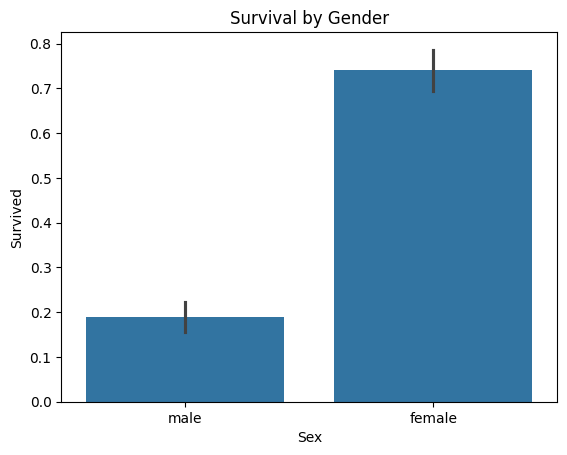

In [12]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival by Gender')

From the above chart, we can determine that female passengers have a higher survival rate as compared to men. This can play an important role in using Machine Learning to estimate the survival of a passenger.

Text(0.5, 1.0, 'Survival by Port of Embarkation')

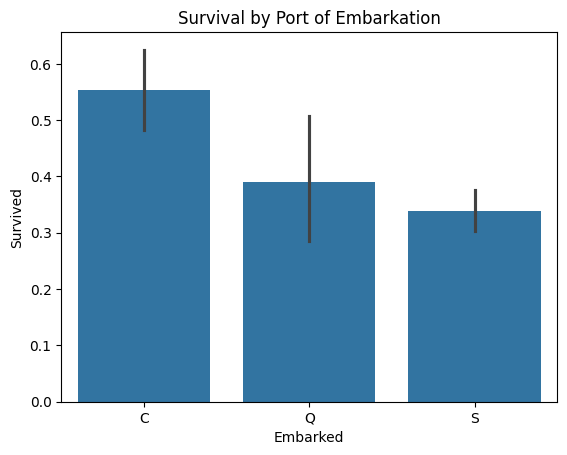

In [13]:
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival by Port of Embarkation')

From the above graph, we can determine that passengers that embarked from C have a higher survival rate as compared to Q and S. Where S is the port of embarkation with the least survival rate.

Text(0.5, 1.0, 'Survival by Passenger Class')

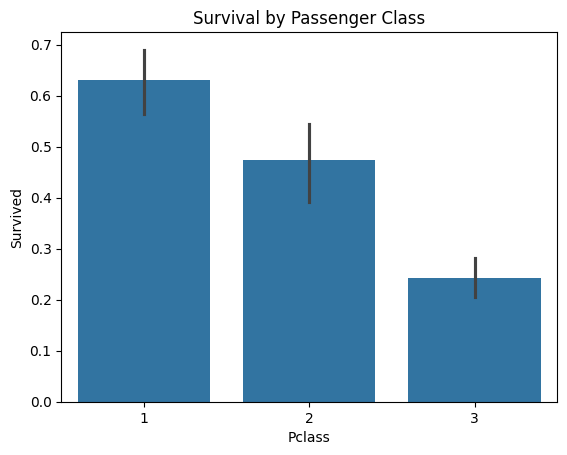

In [14]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival by Passenger Class')

From the above graph, we can determine that higher class passengers have a higher survival rate as compared to passengers in a lower class. We can tell that higher class passengers were given priority is the escape. This feature is useful to our model in determining the survival of the passengers.

<Axes: >

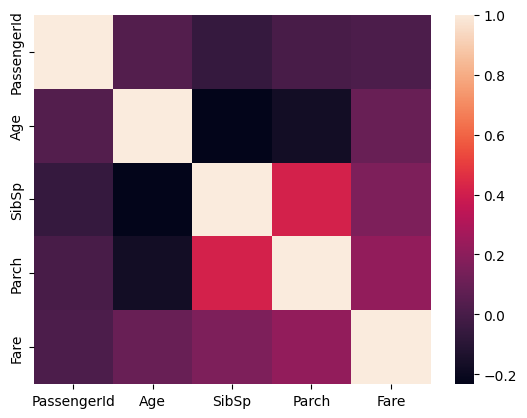

In [15]:
sns.heatmap(data=df.select_dtypes('number').corr())

We generated a heatmap of the dataset with its correlations.
Correlation tells us how much one variable changes with the change of another variable.

The value of a correlation is from -1 to 1, where a value closer to -1 signifies negative correlation (which means that a variable changes negatively with the increase of another variable) and a value closer to 1 signifies positive correlation (which means that a variable changes positively with the increase of another variable)

A simple example, is when you observe the correlation of Fare and PClass, where a lower PClass leads to a higher Fare and vice versa
(PClass 1 -> Highest Fare) and
(PClass 3 -> Lowest Fare)